# Getting started progress report

- toc:false
- branch: master
- badges: true
- comments: false
- categories: [python]
- hide: true

This report provides statistics for class progress in the [Getting Started](https://nu-cem.github.io/CompPhys/) part of the Computational Physics course KD5081 at Northumbria University.

## Prepare system
Install libraries, get Github authentication token and create tasks list.

In [8]:
from github import Github
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
import os

In [17]:
load_dotenv()
GH_TOKEN = os.getenv("GH_TOKEN")  # this is needed to interact with the Github API

In [13]:
tasks = ['Create, save and open a Jupyter Notebook', 'Create a Python list']

## Retrieve and parse issue information

In [10]:
g = Github(GH_TOKEN)

In [11]:
repo = g.get_repo("nu-cem/CompPhys")
checklist_issues = repo.get_issues(labels=["python_checklist"])

In [14]:
totals = [0]*len(tasks)

for issue in checklist_issues:
    body = issue.body
    for i,task in enumerate(tasks):
        if task in body:
            splits = body.split(task,maxsplit=2)
            if splits[0][-4:-1] == '[x]':
                totals[i] += 1
        else:
            print("problem: task not in string")

## Plot results

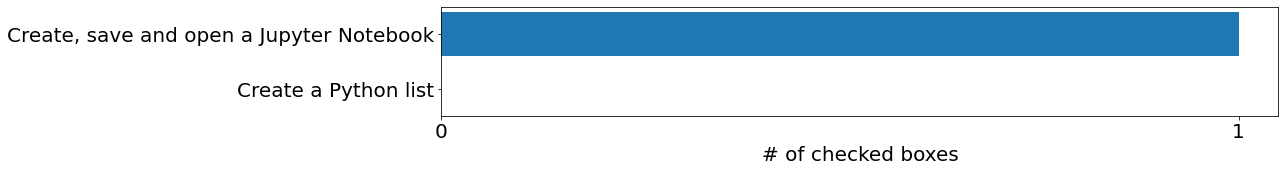

In [22]:
fig, ax = plt.subplots(1,1,figsize=(15,len(tasks)))

ax.barh(np.arange(len(tasks)),totals, align='center')
ax.set_yticks(np.arange(len(tasks)))
ax.set_xticks(np.arange(max(totals)+0.1))
ax.set_yticklabels(tasks)
ax.invert_yaxis()
ax.set_xlabel('# of checked boxes')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.show()